#1. import Dependencies and Pretrained Model

In [ ]:
pip install gradio

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import gradio as gr

In [ ]:
model=hub.load('https://www.kaggle.com/models/google/arbitrary-image-stylization-v1/TensorFlow1/256/2')

In [ ]:
def load_image(img_path):
  img=tf.io.read_file(img_path)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.convert_image_dtype(img,tf.float32)
  img=img[tf.newaxis, :]
  return img

In [ ]:
content_image=load_image('/content/Lumii_20230128_060833403.jpg')
style_image=load_image('/content/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3BkMTk1LTA0NS1nbG95LmpwZw.jpg')

In [ ]:
content_image.shape

TensorShape([1, 2235, 1788, 3])

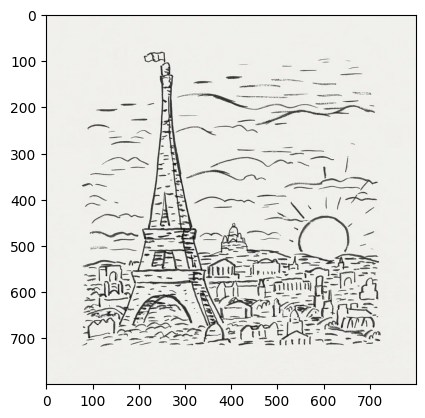

In [ ]:
#plt.imshow(np.squeeze(content_image))
plt.imshow(np.squeeze(style_image))
plt.show()

In [ ]:
new_image=model(tf.constant(content_image),tf.constant(style_image))[0]

In [ ]:
new_image.shape

TensorShape([1, 2236, 1788, 3])

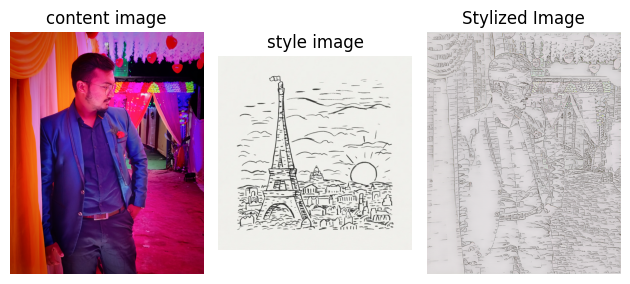

In [ ]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(np.squeeze(content_image))
axes[0].axis('off')
axes[0].set_title('content image')

axes[1].imshow(np.squeeze(style_image))
axes[1].axis('off')
axes[1].set_title('style image')

axes[2].imshow(np.squeeze(new_image))
axes[2].axis('off')
axes[2].set_title('Stylized Image')
plt.tight_layout()
plt.show()